Basic Linear Algebra
===

A **vector** is a list of numbers. A **column** vector aligns those number vertically while a **row** vector aligns them horizontally.

A **matrix** is a set of 2 or more vectors. It has dimensions **mxn** where m is the number of rows and n is the number of columns.

To turn a column vector into a row vector and vice versa, you can **transpose** it.

Basic Python
===

In [45]:
# Variable assignment
x = 3

# Arithmatic
x = 3 + 7
x = 7 /2 # float division
x = 9 // 4 # integer division

# Create a 1D list (row vector)
y = [1, 2, 3]

# Add to list
y.append(4)

# Create 2D list (matrix)
y = [[2, 3], [2, 3]]

# Column vector as Python list
y = [[2], [2]]

# Loops in python
for i in range(0, 10):
    print(i)
    
# Import library
import numpy as np # scientific computing library with lots of linear algebra functions

# Create column vector as numpy array
y = np.array([[1], [2], [3]])
print('column vector y = ', y)

# Get array length
print(len(y))

# Create matrix with numpy
X = np.array([[2, 3], [2, 3]])
print('2x2 matrix', X)

# Transpose matrix or vector with numpy
y_row = y.T
print('row vector y: ', y_row)

# Use numpy for math
x = 9
sqrt_x = np.sqrt(9)
print(sqrt_x)

x = np.square(sqrt_x)
print(x)

0
1
2
3
4
5
6
7
8
9
column vector y =  [[1]
 [2]
 [3]]
3
2x2 matrix [[2 3]
 [2 3]]
row vector y:  [[1 2 3]]
3.0
9.0


Converting Math into Python
===

## Review of Sigma Notation

Sigma notation is used to denote values that should be added up. The number at the bottom of the sigma is the index of the first number in the series to sum and the number at the top is the index of the number to stop the sum.

Example: $ \sum_{n=1}^{4} n^2 = 1 + 2 + 9 + 16 = 28$

To denote the sum of cubes of a list of numbers with length m, write $\sum_{i=1}^{m} n^3$

In Python, you can use a for loop for summations. The example below is the code for $\sum_{i=1}^{N} n^3$

In [50]:
N = [1, 2, 3, 4]

# sum of cubes for list N
sum_of_cubes = 0
for i in range(0, len(N)):
    sum_of_cubes = sum_of_cubes + N[i] ** 3
print(sum_of_cubes)

# shorter syntax
sum_of_cubes = 0
for i in N:
    sum_of_cubes += i**3
print(sum_of_cubes)

# even shorter!
sum_of_cubes = sum([i**3 for i in N])
print(sum_of_cubes)

100
100
100


Chapter 2 Part 1
===

## Problem Framing and Data Exploration

In [14]:
import os # standard Python library used for file IO
import pandas as pd # data wrangling library used to work with tabular data

In [15]:
np.random.seed(42) # set the seed to improve reproducibility

In [16]:
%matplotlib inline 
import matplotlib # primary graphing library for Python
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [17]:
import warnings # silence warnings in notebook
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [18]:
df = pd.read_csv('datasets/housing/ca_housing.csv') # read csv file into dataframe (df) object

In [19]:
df.head() # get first 5 rows of dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
df.info() # get info of columns in dataframe

# Question: How many training features does this df have? What's the dependent variable? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df['ocean_proximity'].value_counts() # get frequencies of different categories for a given feature/column

# Question: What's the cardinality of the ocean proximity feature?

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [22]:
df.describe() # get summary statistics of continuous variables

# Question: What is a discrete variable in this dataset? What's the difference between a continuous and discrete variable?

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


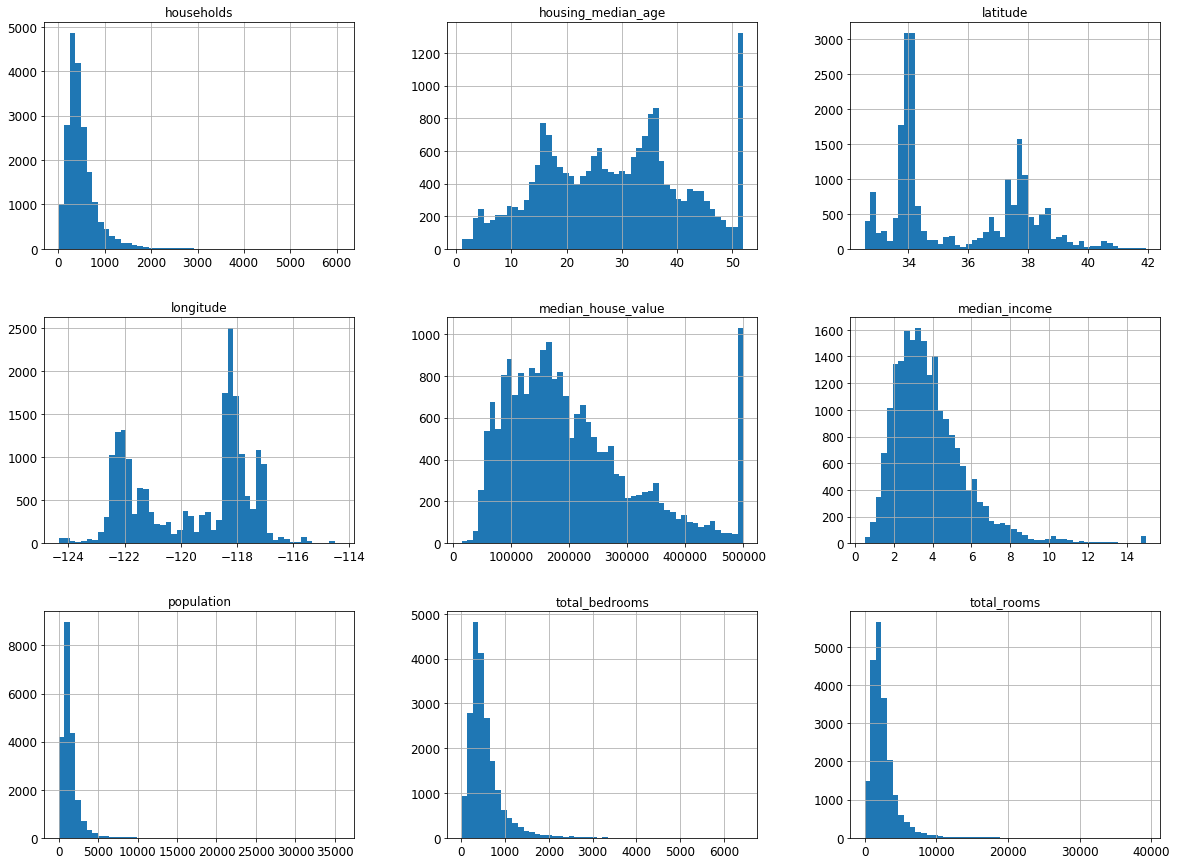

In [23]:
df.hist(bins=50, figsize=(20,15)) # plot continuous variables
plt.show()

In [24]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] # review list slicing if this syntax is unfamiliar
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [25]:
train, test = split_train_test(df, 0.2)
print(f'{len(train)} training data and {len(test)} testing data') # f strings are new in python

16512 training data and 4128 testing data


In [26]:
from sklearn.model_selection import train_test_split # scikit-learn is the primary machine learning library for Python

X = df.drop(columns=['median_house_value']) # create matrix of training instances
y = df['median_house_value'] # create column vector of labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # default test size = 0.25
print(f'{len(X_train)} training data and {len(X_test)} testing data')

16512 training data and 4128 testing data


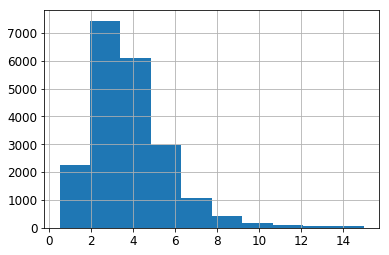

In [27]:
df['median_income'].hist() # create histogram of median income

In [28]:
# Divide by 1.5 to limit the number of income categories
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
# Label those above 5 as 5
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True)

In [29]:
df['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

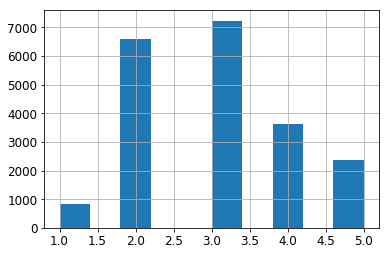

In [30]:
df['income_cat'].hist()

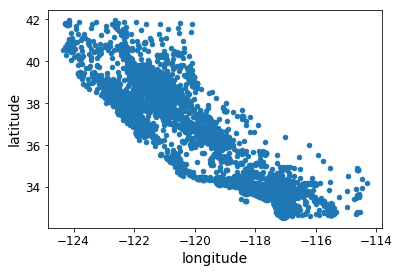

In [31]:
df.plot(kind='scatter', x='longitude', y='latitude') # plot locations using lat/long

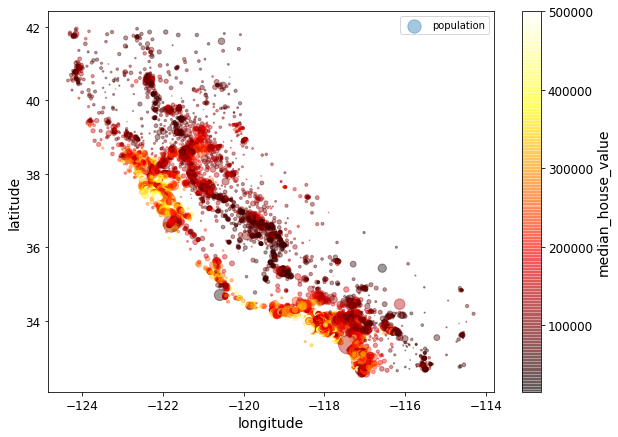

In [32]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("hot"), colorbar=True, # jet is not a good color map, use binary cmaps for heatmaps
    sharex=False)
plt.legend()

In [33]:
corr_matrix = df.corr() # create correlation matrix using the Pearson correlation coefficient

**Pearson Correlation Coefficient**: estimation of how correlated two variables are.

-1 <= r <= 1

r ~ -1 means that the two varaibles have a strong negative correlation

r ~ 0 means that the two variables have no correlation

r ~ 1 means that the two variables have a strong positive correlation

$$r = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{(m - 1)\sigma_x\sigma_y}$$

In [34]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f980c50>,
      dtype=object)

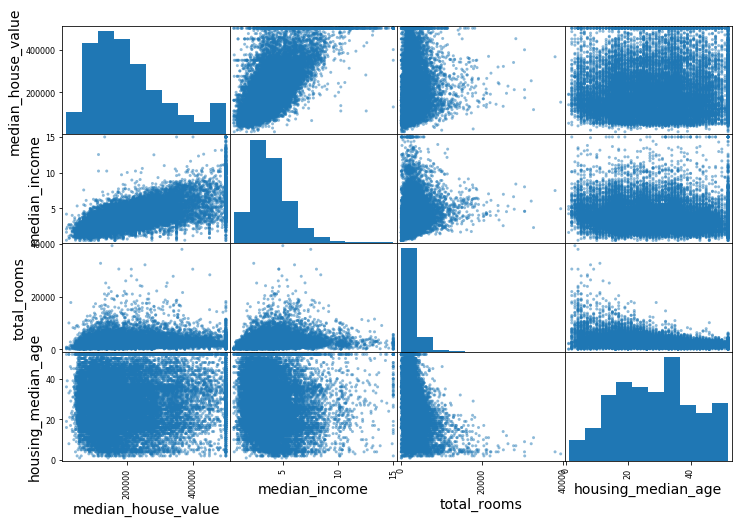

In [40]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms',
              'housing_median_age']
scatter_matrix(df[attributes], figsize=(12, 8))

Problem Set 1
===

1. Create a rectangular matrix X with dimensions 5x2 and a corresponding column vector y using numpy.

In [38]:
X = []

y = []

2. Write a method to compute the mean of a column vector and find the mean of the two columns of X and column y. Check your answer by computing the means by hand.

$$ \bar{x} = \frac{1}{m} \sum_{i=1}^{m} x_i $$

In [39]:
def mean(vec): pass

mean_c1 = 0
mean_c2 = 0
mean_y = 0

3. Write a method to compute the standard deviation of a column vector and compute the sd of the two columns of X and y. Check your answer by computing the standard deviations by hand.

$$ \sigma = \sqrt{\frac{\sum_{i=1}^{m} (x_i - \bar{x})^2}{m - 1}}  $$

In [37]:
def sd(vec): pass

sd_c1 = 0
sd_c2 = 0
sd_y = 0

4. Write a method to compute the root mean squared error of the two column vectors below. Check your answer by computing the errors by hand.

$$ RMSE(y, \hat{y}) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2}$$

In [41]:
y = [
     [1], 
     [2], 
     [3]
]
    
y_hat = [
     [0], 
     [2], 
     [5]
]

def rmse(y,y_hat): pass

5. Write a method to compute the mean absolute error of the previous two column vectors. Check your answer by computting the errors by hand.

$$ MAE(y,\hat{y}) = \frac{1}{m} \sum_{i=1}^{m} |\hat{y}_i - y_i| $$

6. Change the final value in y to 15 and compute the RMSE and MAE. How do they differ? What can you infer on how RMSE and MAE handle outliers?